In [2]:
#Install fastdtw for dynamic time warp analysis
!pip install fastdtw

    100% |################################| 122kB 4.6MB/s ta 0:00:01
  Running setup.py bdist_wheel for fastdtw ... done
  Stored in directory: /root/.cache/pip/wheels/61/62/46/5a9cc316aa50cc4fb36fd4bf14e7dd206642db3247d7746c23
Successfully built fastdtw


In [22]:
#import modules 
import requests 
import base64
import json
import pandas as pd
from pandas.io.json import json_normalize
from pandas import Series
from matplotlib import pyplot as plt
from fastdtw import fastdtw

#Open data from disc
df = pd.read_csv('./tempSensor.csv', index_col=0)
df.head(2)


,temp,time
0,22.86,2018-06-01 17:50:58.339
1,21.84,2018-06-01 18:19:58.318


## Plot timeserises
* Change y,xlim if needed

(18, 28)

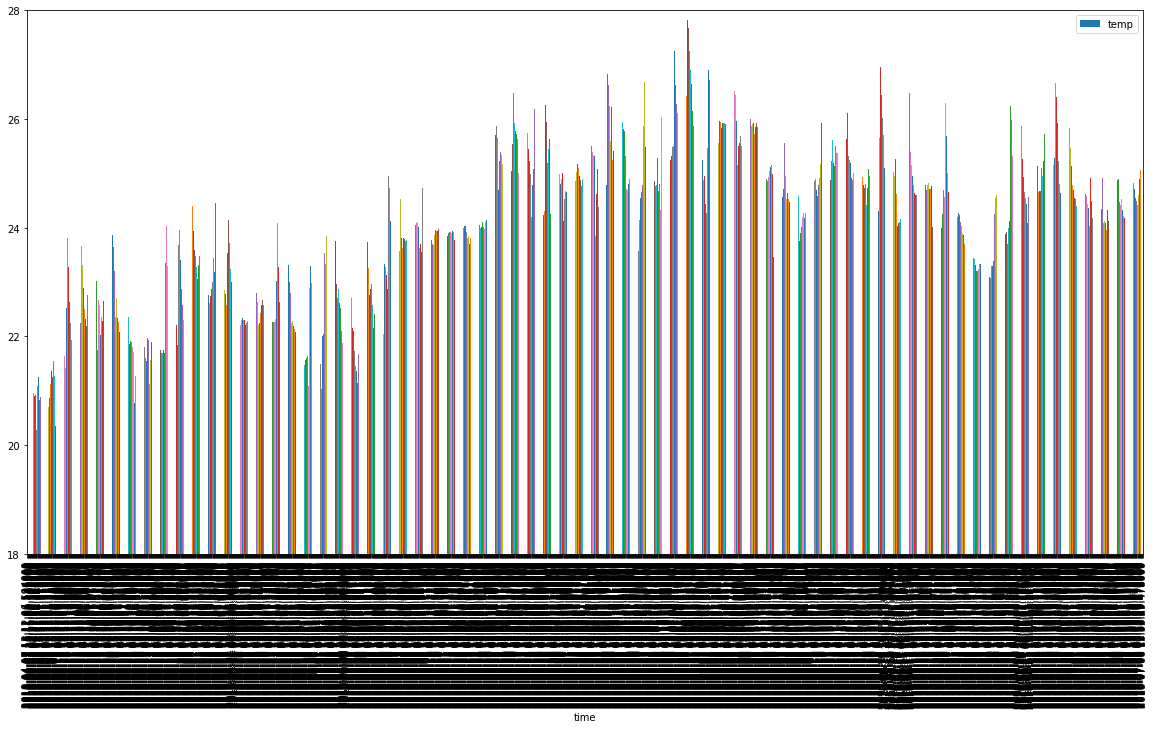

In [4]:

df.plot(x='time',y='temp',kind='bar', figsize=(20,10))
#plt.xlim(70,90)
plt.ylim(18,28)

#, style='.-',markevery=0

## Plot subset

(20, 24.5)

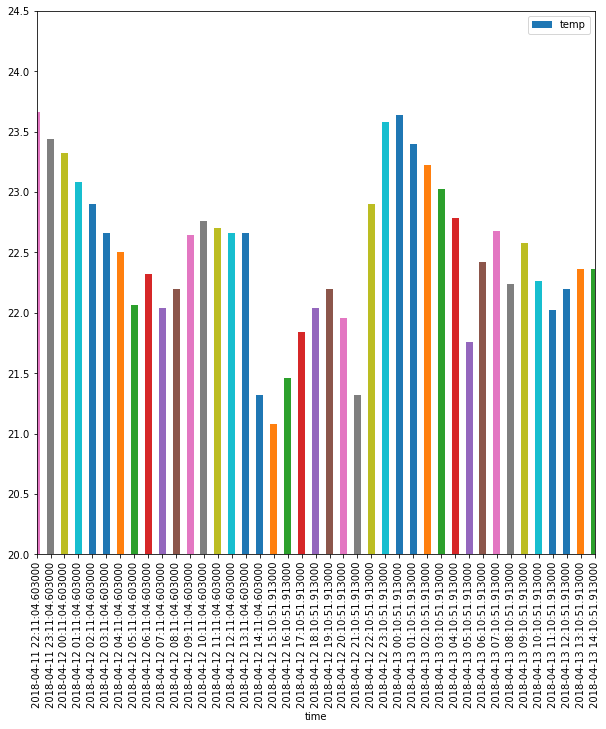

In [12]:

df.plot(x='time',y='temp',kind='bar', figsize=(10,10))
plt.xlim(105,145)
plt.ylim(20,24.5)

#, style='.-',markevery=0

## Import ecluidian and create match sample

In [18]:
import numpy as np
from scipy.spatial.distance import euclidean

#Create a sample to compare against. This will be our fingerprint to match against and find the lower path/match
X = np.array(df['temp'])
y = np.array([ 23, 23.7, 23.5, 23.2])

#### Loop through the data and match aginst the fingerprint sample. 
We can specify a threshold. Only matches above will be stored in our result list

0.29999999999999716 [23.08 23.66 23.44 23.32] 104
0.5600000000000023 [22.9  23.58 23.64 23.4 ] 129
0.5600000000000023 [23.1  23.8  23.64 23.46] 191
0.6799999999999962 [23.   23.32 23.44 22.96] 359
0.6600000000000001 [23.36 23.54 23.5  23.34] 575
0.7000000000000028 [23.18 23.16 23.76 23.36] 595
0.6000000000000014 [23.16 23.76 23.36 22.96] 596
0.6999999999999993 [23.06 23.34 23.3  23.28] 691
0.7399999999999984 [23.36 23.7  23.48 23.56] 761


(21, 24.5)

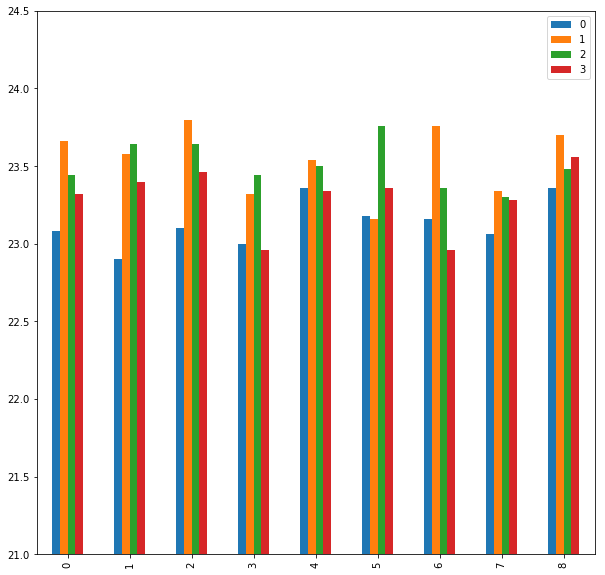

In [29]:
threshold = 0.75
result = []
result_index = []

for x in range (0,1000):
    x_temp = np.array([X[x],X[x+1],X[x+2],X[x+3]])
    distance, path = fastdtw(x_temp, y, dist=euclidean)
    if ( distance < threshold):
        result.append(x_temp)
        result_index.append(x)
        print(distance, x_temp, x)


#Plot some of the results        
pf_dtw = pd.DataFrame(result)
pf_dtw.plot(kind='bar', figsize=(10,10))
plt.ylim(21,24.5)




### Plot the results and put the result_index above to visualize the predicted matches

(20, 24.5)

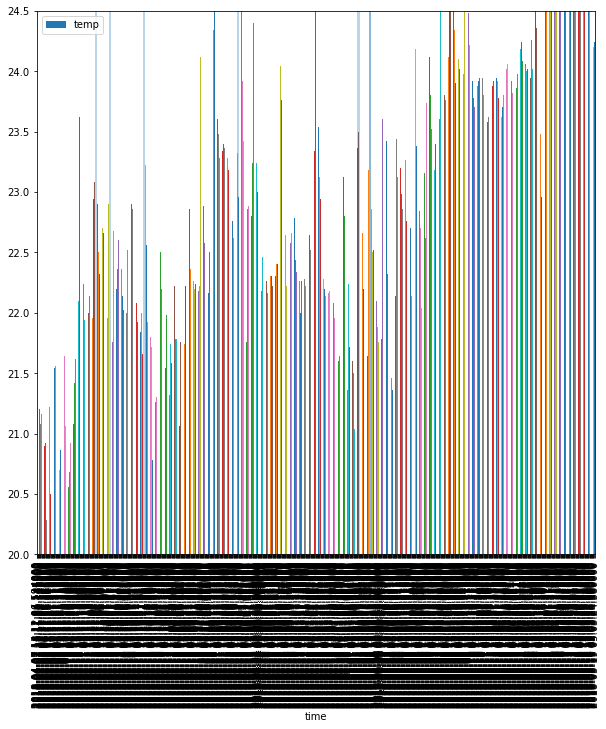

In [34]:

df.plot(x='time',y='temp',kind='bar', figsize=(10,10))
for x in range(0,7):
    plt.axvspan(result_index[x],result_index[x]+4,alpha=0.3)
plt.xlim(0,1000)
plt.ylim(20,24.5)

(20, 24.5)

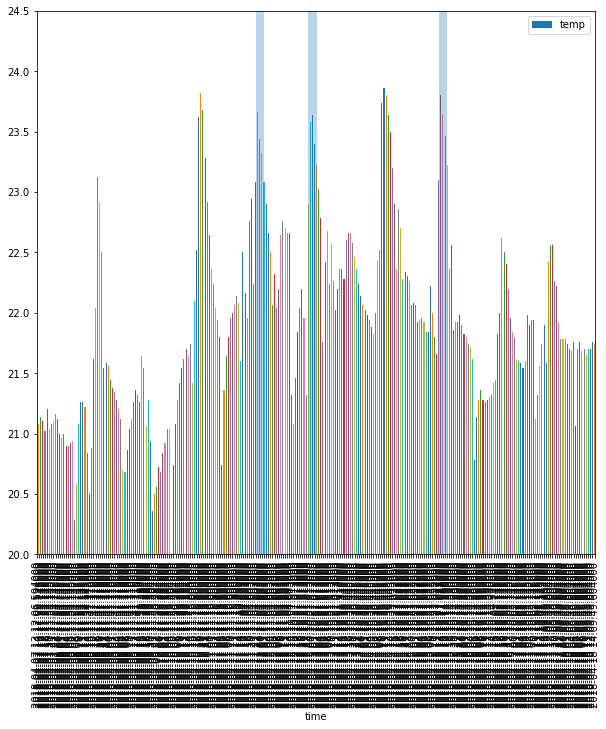

In [30]:
df.plot(x='time',y='temp',kind='bar', figsize=(10,10))
plt.axvspan(result_index[0],result_index[0]+4,alpha=0.3)
plt.axvspan(result_index[1],result_index[1]+4,alpha=0.3)
plt.axvspan(result_index[2],result_index[2]+4,alpha=0.3)
plt.axvspan(result_index[3],result_index[3]+4,alpha=0.3)

plt.xlim(0,265)
plt.ylim(20,24.5)

### Conclusion
DTW is fast and easy to use. For our problem we only have limited datapoints and the fingerprint to match has to be very precise in order to get a good match. If the real data fluctuates far from the recorded sample it will be hard to get consistant result. 
DTW seems to be a good usage if the matching patterns are consistant